# Homework  
Data documentation: https://tidyr.tidyverse.org/reference/who.html

__Directions:__ Answer the three questions below. Create as many code/markdown blocks necessary to answer the questions. 

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/who.csv')

In [26]:
df.head()

#df.columns
#df.shape[1]
#print(f'Rows: {df.shape[0]:}')
#df.dropna().shape


,country,iso2,iso3,year,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,...,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
0,Afghanistan,AF,AFG,1980,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AF,AFG,1981,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AF,AFG,1982,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AF,AFG,1983,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AF,AFG,1984,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df = df.drop(columns=['iso2', 'iso3'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7240 entries, 0 to 7239
Data columns (total 58 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       7240 non-null   object 
 1   year          7240 non-null   int64  
 2   new_sp_m014   3173 non-null   float64
 3   new_sp_m1524  3209 non-null   float64
 4   new_sp_m2534  3206 non-null   float64
 5   new_sp_m3544  3219 non-null   float64
 6   new_sp_m4554  3223 non-null   float64
 7   new_sp_m5564  3218 non-null   float64
 8   new_sp_m65    3209 non-null   float64
 9   new_sp_f014   3174 non-null   float64
 10  new_sp_f1524  3194 non-null   float64
 11  new_sp_f2534  3200 non-null   float64
 12  new_sp_f3544  3199 non-null   float64
 13  new_sp_f4554  3204 non-null   float64
 14  new_sp_f5564  3195 non-null   float64
 15  new_sp_f65    3197 non-null   float64
 16  new_sn_m014   1045 non-null   float64
 17  new_sn_m1524  1030 non-null   float64
 18  new_sn_m2534  1022 non-null 

## Question 1. We need to know what's included in this data.
- How many countries are present?  
- What's the timespan of the data?  
- Does each country have a row for every year present?  
- Which countries are missing years?  
- How many rows have at least 1 non-null values across the columns 3-57?

In [28]:
# How many countries are present?
countries= df['country'].nunique() #gives unique names 
print(f'No. of countries: {countries}')

No. of countries: 219


In [29]:
#What's the timespan of the data?
starting =df['year'].min()
ending=df['year'].max()

print(f"timespan: {df['year'].min()} to {df['year'].max()}" )
#df['year'].max-df['year'].min
print(ending-starting)

timespan: 1980 to 2013
33


In [30]:
#Does each country have a row for every year present?
country_row_every_year = df.groupby('country')['year'].nunique()
print(country_row_every_year)


country
Afghanistan                  34
Albania                      34
Algeria                      34
American Samoa               34
Andorra                      34
                             ..
Wallis and Futuna Islands    34
West Bank and Gaza Strip     34
Yemen                        34
Zambia                       34
Zimbabwe                     34
Name: year, Length: 219, dtype: int64


In [74]:
#Which countries are missing years?
missing_values=country_row_every_year[country_row_every_year!=(ending-starting+1)]
print(missing_values)


country
Bonaire, Saint Eustatius and Saba     4
Curacao                               4
Montenegro                            9
Netherlands Antilles                 30
Serbia                                9
Serbia & Montenegro                  25
Sint Maarten (Dutch part)             4
South Sudan                           3
Timor-Leste                          12
Name: year, dtype: int64


In [92]:
#How many rows have at least 1 non-null values across the columns 3-57?
#selected_columns = df.iloc[:, 2:58]
nonnull_values= df.iloc[:, 2:58].notna().any(axis=1).sum()
print(nonnull_values)





3484


## Question 2: Wide data isn't usually helpful.
Convert this to a long format with the following columns:  
1. country  
2. year  
3. diagnosis method: mapping should be: 

```
  {'newsp':'Pulmonary Smear (+)'
  ,'newsn':'Pulmonary Smear (-)'
  ,'newep':'Extrapulmonary'
  ,'newrel':'Relapse'}   
 ```

4. gender: male or female.   
5. age: lower_age - higher_age, e.g., 0-14  
6. number of cases  

__Note__: You can use `replace` (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html)

In [168]:


df.columns = df.columns.str.replace(r"new_sp" ,'Pulmonary Smear (+)')
df.columns = df.columns.str.replace(r"new_sn" ,'Pulmonary Smear (-)')
df.columns = df.columns.str.replace(r"new_ep" ,'Extrapulmonary')
df.columns = df.columns.str.replace(r"newrel" ,'Relapse')
df.columns = df.columns.str.replace(r"_m",'_Male_')
df.columns = df.columns.str.replace(r"_f",'_Female_')
df.head()



,country,year,Pulmonary Smear (+)_Male_014,Pulmonary Smear (+)_Male_1524,Pulmonary Smear (+)_Male_2534,Pulmonary Smear (+)_Male_3544,Pulmonary Smear (+)_Male_4554,Pulmonary Smear (+)_Male_5564,Pulmonary Smear (+)_Male_65,Pulmonary Smear (+)_Female_014,...,Relapse_Male_4554,Relapse_Male_5564,Relapse_Male_65,Relapse_Female_014,Relapse_Female_1524,Relapse_Female_2534,Relapse_Female_3544,Relapse_Female_4554,Relapse_Female_5564,Relapse_Female_65
0,Afghanistan,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [169]:

df_long = df.melt(id_vars=['country', 'year'], var_name='diagnosis_details', value_name='number of cases')
df_long

,country,year,diagnosis_details,number of cases
0,Afghanistan,1980,Pulmonary Smear (+)_Male_014,NaN
1,Afghanistan,1981,Pulmonary Smear (+)_Male_014,NaN
2,Afghanistan,1982,Pulmonary Smear (+)_Male_014,NaN
3,Afghanistan,1983,Pulmonary Smear (+)_Male_014,NaN
4,Afghanistan,1984,Pulmonary Smear (+)_Male_014,NaN
...,...,...,...,...
405435,Zimbabwe,2009,Relapse_Female_65,NaN
405436,Zimbabwe,2010,Relapse_Female_65,NaN
405437,Zimbabwe,2011,Relapse_Female_65,NaN
405438,Zimbabwe,2012,Relapse_Female_65,NaN


In [170]:

df_long[['diagnosis_method', 'temp']] = df_long['diagnosis_details'].str.split('_', 1, expand=True)


C:\Users\RESHMA CHOWDARY\AppData\Local\Temp\ipykernel_19160\2298966417.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df_long[['diagnosis_method', 'temp']] = df_long['diagnosis_details'].str.split('_', 1, expand=True)


In [171]:

df_long['gender'] = df_long['temp'].str.split('_').str[-2]


In [172]:

df_long['temp_age'] = df_long['temp'].str.split('_').str[-1]


In [173]:

df_long['Age'] = df_long['temp_age'].str[:-2] + '-' + df_long['temp_age'].str[-2:]
df_long['Age'] = df_long['Age'].str.replace(r'-65', '65')


In [174]:
df_long = df_long.drop(columns=['diagnosis_details', 'temp', 'temp_age'])

In [175]:
df_long = df_long[['country', 'year', 'diagnosis_method', 'gender', 'Age', 'number of cases']]
df_long


,country,year,diagnosis_method,gender,Age,number of cases
0,Afghanistan,1980,Pulmonary Smear (+),Male,0-14,NaN
1,Afghanistan,1981,Pulmonary Smear (+),Male,0-14,NaN
2,Afghanistan,1982,Pulmonary Smear (+),Male,0-14,NaN
3,Afghanistan,1983,Pulmonary Smear (+),Male,0-14,NaN
4,Afghanistan,1984,Pulmonary Smear (+),Male,0-14,NaN
...,...,...,...,...,...,...
405435,Zimbabwe,2009,Relapse,Female,65,NaN
405436,Zimbabwe,2010,Relapse,Female,65,NaN
405437,Zimbabwe,2011,Relapse,Female,65,NaN
405438,Zimbabwe,2012,Relapse,Female,65,NaN


## Question 3: Create a graph that shows when countries started to report TB cases.

In [176]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
strt_yr = df.groupby('country')['year'].min()
print(strt_yr)
print('tail')


country
Afghanistan                  1980
Albania                      1980
Algeria                      1980
American Samoa               1980
Andorra                      1980
                             ... 
Wallis and Futuna Islands    1980
West Bank and Gaza Strip     1980
Yemen                        1980
Zambia                       1980
Zimbabwe                     1980
Name: year, Length: 219, dtype: int64
tail


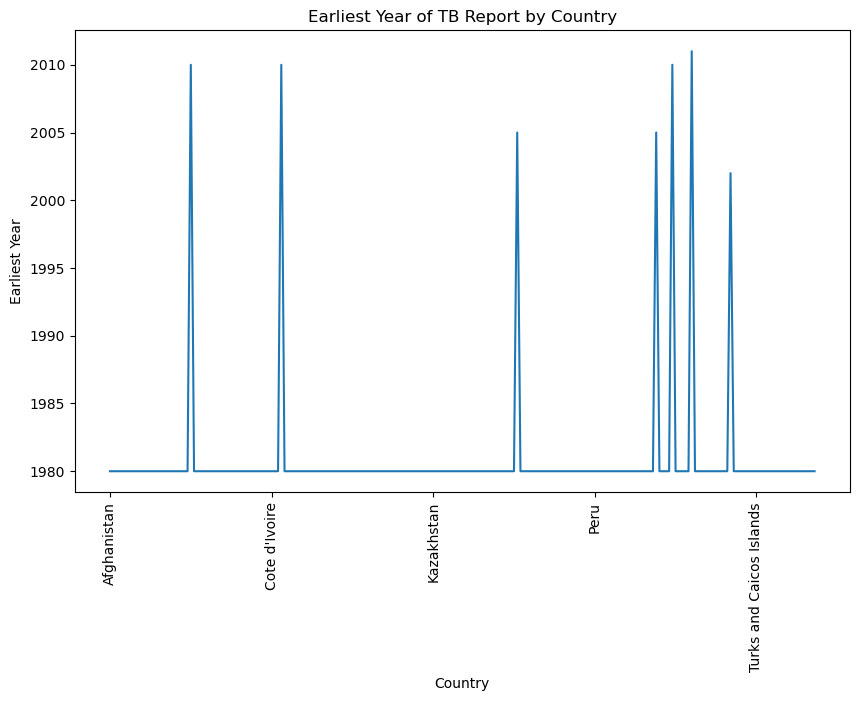

In [177]:
plt.figure(figsize=(10, 6))
strt_yr.plot(kind='line')
plt.title('Earliest Year of TB Report by Country')
#plt.xlim(1980,2010)
plt.xlabel('Country') 
plt.ylabel('Earliest Year')
plt.xticks(rotation=90)
plt.show()